![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO CALCULATE IMPLIED VOLATILITY FROM OPTIONS PRICES**

## **¿What is the implied volatility?**

<font size="3"> Options markets have come a long way since the 1970s, when the <a href="https://quant-trading.co/black-scholes-formula-in-python/" target="_blank">Black Scholes (BS) formula</a> was published. The formula became so well established in traders' minds that it is still widely used today despite its flaws. One of the biggest consequences from the used of this formula was the concept of implied volatility. This measure acts in a very similar way to how the yield to maturity of a bond works. When using the yield to maturity, traders can easily compare the relative value of bonds with different maturities or credit qualities without needing to look at the raw price. Similarly, options traders look at implied volatility to compare different options without needing to look at the premiums at which they are trading in the market. Implied volatility is also widely used to compare it to the realized volatility of the underlying asset.<br><br>
    
<font size="3"> Implied volatility is the volatility that would have to be entered into the BS formula to obtain an observed market price. We know that the price of an option under the Black-Scholes paradigm is a function of the Spot (S), the Strike (K), the interest rate (r), the time to expiration (T) and the volatility (sigma). So, if we don't know the volatility, but can observe a price, it is easy to calculate what people called "The implied volatility". To explain this concept in an easy way, we will work with an example<br><br>

In [1]:
from scipy.stats import norm
import math
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf  #Yahoo Finance
import datetime
import pandas as pd

## **Download the date from the yahoo finance API**

<font size="3"> The first thing we need to do is to download options data from the yahoo finance API. To download that information we can use the yfinance library as we explain in this <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">link</a>  In this example we will be working with the Nvidia stock (NVDA). In the following scrip you can see how can we download the expiration date for listed stock vanilla options on NVDA.<br><br>

In [2]:
ticker = 'NVDA'
my_ticker = yf.Ticker(ticker)

exp_dates = my_ticker.options
exp_dates

('2024-09-20',
 '2024-09-27',
 '2024-10-04',
 '2024-10-11',
 '2024-10-18',
 '2024-10-25',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-04-17',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

<font size="3"> If we use the function option_chain on a particular date, we will get the information for calls and puts for different strikes as you can see below.<br><br>

In [3]:
my_ticker.option_chain('2024-10-11')

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   NVDA241011C00050000 2024-09-12 14:13:28+00:00    50.0      69.30  68.80   
1   NVDA241011C00055000 2024-09-12 19:49:56+00:00    55.0      64.50  63.80   
2   NVDA241011C00060000 2024-09-11 17:27:37+00:00    60.0      54.00  58.95   
3   NVDA241011C00065000 2024-09-12 14:23:40+00:00    65.0      55.00  54.05   
4   NVDA241011C00070000 2024-09-12 17:56:22+00:00    70.0      51.10  49.10   
..                  ...                       ...     ...        ...    ...   
63  NVDA241011C00185000 2024-09-13 19:53:44+00:00   185.0       0.05   0.04   
64  NVDA241011C00190000 2024-09-13 19:08:41+00:00   190.0       0.05   0.04   
65  NVDA241011C00195000 2024-09-11 18:01:03+00:00   195.0       0.04   0.03   
66  NVDA241011C00200000 2024-09-13 18:55:50+00:00   200.0       0.04   0.02   
67  NVDA241011C00205000 2024-09-13 15:34:09+00:00   205.0       0.03   0.02   

      ask  change  percentChange  vol

In [4]:
#This is a DataFrame
my_options = my_ticker.option_chain('2024-10-11')[0]
my_options.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NVDA241011C00050000,2024-09-12 14:13:28+00:00,50.0,69.3,68.80,69.55,0.0,0.0,2,11,1.304691,True,REGULAR,USD
1,NVDA241011C00055000,2024-09-12 19:49:56+00:00,55.0,64.5,63.80,64.75,0.0,0.0,1,1,1.312503,True,REGULAR,USD
2,NVDA241011C00060000,2024-09-11 17:27:37+00:00,60.0,54.0,58.95,59.65,0.0,0.0,3,6,1.201176,True,REGULAR,USD
3,NVDA241011C00065000,2024-09-12 14:23:40+00:00,65.0,55.0,54.05,54.75,0.0,0.0,1,2,1.146489,True,REGULAR,USD
4,NVDA241011C00070000,2024-09-12 17:56:22+00:00,70.0,51.1,49.10,49.90,0.0,0.0,1,112,1.075200,True,REGULAR,USD


## **How do you calculate implied volatility**

<font size="3"> You can't solve the Black-Scholes equation analytically to have the volatility parameter as a function of the other parameters. Therefore, to calculate implied volatility we need to use a root finding method. In other blog posts we explained two of the most used methods to calculate implied volatility: a) <a href="https://quant-trading.co/bisection-method-to-calculate-implied-volatility/" target="_blank">Bisection Method</a>, b) <a href="https://quant-trading.co/newton-raphson-method-to-calculate-implied-volatility/" target="_blank">Newton Rapshon Method</a>. Below you can find the functions for those algorithms: <br><br>

In [28]:
def bisect(target,targetfunction, start=None,bounds = None, tols=[0.01,0.01], maxiter=100):

#Prevent running if we don't have bounds nor a start point
    if bounds == None and start == None:

        raise Exception ("Please provide either a starting point or some bounds"            )

    else:
    
    #assign the given bounds to our interval [a,b]. This will depend if we have the bounds or not.

        #if we have bounds then we assign them to [a,b]
        if bounds != None:
            a = bounds[0]
            b = bounds[1]

            #if start is equal to None then we assign the mid value of the interval as a starting point. 
            if start == None:
                start = 0.5*(a+b)

            #Our function returns x. So we initialize x with the value of a
            x = np.array([0.0])
            x[0] = a

            if  np.abs(targetfunction(a)-target)< tols[1]:
                return x
            else:  
                x.resize(2)
                x[1] = b
                if np.abs(targetfunction(b)-target)< tols[1]:          
                    return x
                else:        

                    x.resize(3)
                    x[2] = start

                    #Here comes the algorithm to search for the root

                    #First we check if we have a root. The condition is a sign change
                    
                    if (targetfunction(a)-target)*(targetfunction(b)-target) > 0:
                        raise Exception ("In the boundaries of the interval the function has the same sign, so we are not sure if a root exists. Please redefine the bounds")
                    else:

                        #Here we evaluate for the case when the left side of the interval is less than zero
                        if (targetfunction(a)-target)<0:

                            for i in range(2,maxiter):            

                                diff = targetfunction(x[i]) - target

                                if b-a < tols[0]:
                                    x[i] = (a+b)/2
                                    return x
                                    break
                                elif np.abs(diff) < tols[1]:
                                    return x 
                                    break
                                elif x.size == maxiter:
                                    raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                    break
                                elif (targetfunction(x[i])-target) < 0:
                                    a = x[i]
                                else:
                                    b = x[i]
                                x.resize(i+2)
                                x[i+1] = 0.5*(a+b)
                            return x
                        
                        

                        #Here we evaluate for the case when the right side of the interval is less than zero
                        elif (targetfunction(a)-target)>0:

                            for i in range(2,maxiter):            

                                diff = targetfunction(x[i]) - target

                                if b-a < tols[0]:
                                    x[i] = (a+b)/2
                                    return x
                                    break
                                elif np.abs(diff) < tols[1]:
                                    return x
                                    break
                                elif x.size == maxiter:
                                    raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                    break
                                elif (targetfunction(x[i])-target) < 0:
                                    b = x[i]                            
                                else:
                                    a = x[i]
                                x.resize(i+2)
                                x[i+1] = 0.5*(a+b)
                            return x
            

        #if we don't have bounds we have to get them. At this point we know that we have a starting point (we would have risen an exception if not)
        else:

            #if we have a starting point then we can assign the bounds seeking left and right by the x-tolerance raised powers of 2
            if start != None:
                a = start-tols[0]*math.pow(2,0)
                b = start+tols[0]*math.pow(2,0)

                i = 1
                test =(targetfunction(a)-target)*(targetfunction(b)-target) 

                #we repeat the loop until we see a sign change in the interval
                while test > 0:                
                    a = start-tols[0]*math.pow(2,i)
                    b = start+tols[0]*math.pow(2,i)
                    test =(targetfunction(a)-target)*(targetfunction(b)-target) 
                    i = i+1
                    if i > maxiter:
                        raise Exception ("We could not find any root in the interval " )
                        break
            
                #Our function returns x. So we initialize x with the start value
                x = np.array([0.0])
                x[0] = start

                #Here comes the algorithm to search for the root

                #First we check if we have a root. The condition is a sign change
                
                if (targetfunction(a)-target)*(targetfunction(b)-target) > 0:
                    raise Exception ("In the boundaries of the interval the function has the same sign, so we are not sure if a root exists. Please redefine the bounds")
                else:

                    #Here we evaluate for the case when the left side of the interval is less than zero
                    if (targetfunction(a)-target)<0:

                        for i in range(0,maxiter):            

                            diff = targetfunction(x[i]) - target

                            if b-a < tols[0]:
                                return x
                                break
                            elif np.abs(diff) < tols[1]:
                                return x
                                break
                            elif x.size == maxiter:
                                raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                break
                            elif (targetfunction(x[i])-target) < 0:
                                a = x[i]
                            else:
                                b = x[i]
                            x.resize(i+2)
                            x[i+1] = 0.5*(a+b)
                        return x                    
                    

                    #Here we evaluate for the case when the right side of the interval is less than zero
                    elif (targetfunction(a)-target)>0:
                        for i in range(0,maxiter):            

                            diff = targetfunction(x[i]) - target

                            if b-a < tols[0]:
                                return x
                                break
                            elif np.abs(diff) < tols[1]:
                                return x
                                break
                            elif x.size == maxiter:
                                raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                break
                            elif (targetfunction(x[i])-target) < 0:
                                b = x[i]
                            else:
                                a = x[i]
                            x.resize(i+2)
                            x[i+1] = 0.5*(a+b)
                        return x

In [5]:
def bisect(target,targetfunction, start=None,bounds = None, tols=[0.01,0.01], maxiter=100):

#Prevent running if we don't have bounds nor a start point
    if bounds == None and start == None:

        raise Exception ("Please provide either a starting point or some bounds"            )

    else:
    
    #assign the given bounds to our interval [a,b]. This will depend if we have the bounds or not.

        #if we have bounds then we assign them to [a,b]
        if bounds != None:
            a = bounds[0]
            b = bounds[1]

            #if start is equal to None then we assign the mid value of the interval as a starting point. 
            if start == None:
                start = 0.5*(a+b)

            #Our function returns x. So we initialize x with the value of a
            x = np.array([0.0])
            x[0] = a

            if  math.fabs(targetfunction(a)-target)< tols[1]:
                return x
            else:  
                x.resize(2)
                x[1] = b
                if math.fabs(targetfunction(b)-target)< tols[1]:          
                    return x
                else:        

                    x.resize(3)
                    x[2] = start

                    #Here comes the algorithm to search for the root

                    #First we check if we have a root. The condition is a sign change
                    
                    if (targetfunction(a)-target)*(targetfunction(b)-target) > 0:
                        raise Exception ("In the boundaries of the interval the function has the same sign, so we are not sure if a root exists. Please redefine the bounds")
                    else:

                        #Here we evaluate for the case when the left side of the interval is less than zero
                        if (targetfunction(a)-target)<0:

                            for i in range(2,maxiter):            

                                diff = targetfunction(x[i]) - target

                                if b-a < tols[0]:
                                    x[i] = (a+b)/2
                                    return x
                                    break
                                elif math.fabs(diff) < tols[1]:
                                    return x 
                                    break
                                elif x.size == maxiter:
                                    raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                    break
                                elif (targetfunction(x[i])-target) < 0:
                                    a = x[i]
                                else:
                                    b = x[i]
                                x.resize(i+2)
                                x[i+1] = 0.5*(a+b)
                            return x
                        
                        

                        #Here we evaluate for the case when the right side of the interval is less than zero
                        elif (targetfunction(a)-target)>0:

                            for i in range(2,maxiter):            

                                diff = targetfunction(x[i]) - target

                                if b-a < tols[0]:
                                    x[i] = (a+b)/2
                                    return x
                                    break
                                elif math.fabs(diff) < tols[1]:
                                    return x
                                    break
                                elif x.size == maxiter:
                                    raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                    break
                                elif (targetfunction(x[i])-target) < 0:
                                    b = x[i]                            
                                else:
                                    a = x[i]
                                x.resize(i+2)
                                x[i+1] = 0.5*(a+b)
                            return x
            

        #if we don't have bounds we have to get them. At this point we know that we have a starting point (we would have risen an exception if not)
        else:

            #if we have a starting point then we can assign the bounds seeking left and right by the x-tolerance raised powers of 2
            if start != None:
                a = start-tols[0]*math.pow(2,0)
                b = start+tols[0]*math.pow(2,0)

                i = 1
                test =(targetfunction(a)-target)*(targetfunction(b)-target) 

                #we repeat the loop until we see a sign change in the interval
                while test > 0:                
                    a = start-tols[0]*math.pow(2,i)
                    b = start+tols[0]*math.pow(2,i)
                    test =(targetfunction(a)-target)*(targetfunction(b)-target) 
                    i = i+1
                    if i > maxiter:
                        raise Exception ("We could not find any root in the interval " )
                        break
            
                #Our function returns x. So we initialize x with the start value
                x = np.array([0.0])
                x[0] = start

                #Here comes the algorithm to search for the root

                #First we check if we have a root. The condition is a sign change
                
                if (targetfunction(a)-target)*(targetfunction(b)-target) > 0:
                    raise Exception ("In the boundaries of the interval the function has the same sign, so we are not sure if a root exists. Please redefine the bounds")
                else:

                    #Here we evaluate for the case when the left side of the interval is less than zero
                    if (targetfunction(a)-target)<0:

                        for i in range(0,maxiter):            

                            diff = targetfunction(x[i]) - target

                            if b-a < tols[0]:
                                return x
                                break
                            elif math.fabs(diff) < tols[1]:
                                return x
                                break
                            elif x.size == maxiter:
                                raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                break
                            elif (targetfunction(x[i])-target) < 0:
                                a = x[i]
                            else:
                                b = x[i]
                            x.resize(i+2)
                            x[i+1] = 0.5*(a+b)
                        return x                    
                    

                    #Here we evaluate for the case when the right side of the interval is less than zero
                    elif (targetfunction(a)-target)>0:
                        for i in range(0,maxiter):            

                            diff = targetfunction(x[i]) - target

                            if b-a < tols[0]:
                                return x
                                break
                            elif math.fabs(diff) < tols[1]:
                                return x
                                break
                            elif x.size == maxiter:
                                raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
                                break
                            elif (targetfunction(x[i])-target) < 0:
                                b = x[i]
                            else:
                                a = x[i]
                            x.resize(i+2)
                            x[i+1] = 0.5*(a+b)
                        return x

In [6]:
def newtonraphson(target,targetfunction, targetfunction_prime,start,tol=0.01,maxiter=100):
    
    x = np.array([0.0])
    x[0] = start

    for i in range(0,maxiter):
        diff = targetfunction(x[i]) - target
        if math.fabs(diff) < tol:
            return x 
            break
        elif x.size == maxiter:
            raise Exception ("We have reached the maximum number of iterations but haven't found the root for the desired tolerance")
            break
        else:
            x.resize(i+2)
            if targetfunction_prime(x[i])== 0:
                raise Exception ("We can't find a root with this starting point")
            else:
                x[i+1] = x[i]-(diff/targetfunction_prime(x[i]))
    return x

In [7]:
def bsimpvol(callput,S0,K,r,T,price,q=0.0,pricetolerance=0.01,method='bisect'):

    #Changing possible integers to float
    S0 = float(S0)
    K = float(K)
    r = float(r)
    T = float(T)
    price = float(price)

    # calculate the intrinsic value to see if the price for In the Money options is at least this value

    forward = S0*np.exp((r-q)*T)
    if callput == 'call'and K < forward:
        intrinsic_value = (forward  - K)*np.exp(-r*T)
    elif callput == 'put'and K > forward:
        intrinsic_value = (K - forward)*np.exp(-r*T)
    else:
        intrinsic_value = 0

    if price < intrinsic_value:
        print ("The option's price should be at least its intrinsic value. We can't calculate any implied vol")
        NaN = 'NaN'
        return NaN
        
    else:
        
        if method=='bisect':
            
            def bsformula_reduced(sigma):
                    
                d1 = (np.log(S0 / K) + (r -q + sigma**2 / 2) * T) / (sigma * T**0.5)
                d2 = d1 - sigma * T**0.5            

                if callput == 'call':
                    nd1 = norm.cdf(d1, )
                    nd2 = norm.cdf(d2, )        
                    optionValue = S0*np.exp(-q*T) * nd1 - K * np.exp(-r * T) * nd2                

                elif callput == 'put':
                    nd1 = norm.cdf(-d1, )
                    nd2 = norm.cdf(-d2, )
                    optionValue = -S0*np.exp(-q*T) *  nd1 + K * np.exp(-r * T) * nd2

                else:
                    raise Exception ("You can just imput [call] or [put] in the first parameter")
                    
                return optionValue
            try:
                return bisect(price,bsformula_reduced,0.1,None,[pricetolerance,pricetolerance],maxiter=200)
            except:
                NaN = 'NaN'
                return NaN
        
        elif method == 'newton':
            

            def bsformula_reduced(sigma):                              
                    
                d1 = (np.log(S0 / K) + (r -q + sigma**2 / 2) * T) / (sigma * T**0.5)
                d2 = d1 - sigma * T**0.5

                if callput == 'call':
                    nd1 = norm.cdf(d1, )
                    nd2 = norm.cdf(d2, )        
                    optionValue = S0*np.exp(-q*T) * nd1 - K * np.exp(-r * T) * nd2                

                elif callput == 'put':
                    nd1 = norm.cdf(-d1, )
                    nd2 = norm.cdf(-d2, )
                    optionValue = -S0*np.exp(-q*T) *  nd1 + K * np.exp(-r * T) * nd2

                else:
                    raise Exception ("You can just imput [call] or [put] in the first parameter")
                    
                return optionValue

            def vega_reduced(sigma):                              
                    
                d1 = (np.log(S0 / K) + (r-q  + sigma**2 / 2) * T) / (sigma * T**0.5)
                d2 = d1 - sigma * T**0.5
                nd1_prime = 1/(((2*np.pi)**0.5)*(np.exp((d1**2)/2)))
                vega = S0*(T**0.5)*nd1_prime*np.exp(-q*T)
                    
                return vega

            try:
                return newtonraphson(price,bsformula_reduced, vega_reduced,0.1,pricetolerance,maxiter=200)
            except:
                NaN = 'NaN'
                return NaN

## **Check an example from the DataFrame**

<font size="3"> Let's calculate the implied volatility for the last option in our DataFrame. To be able to calculate implied volatility we need to define some parameters, such as the time to maturity T, the interest rate r and the spot price S. In this example we can easily get T from the option's expiration date. WE will assume r is equal to 5.5% since it is a very short date option and that's the FED's rate. The spot price can be obtanined from the yahoo finance information as well. Below, we show how to do that:<br><br>

<font size="3"> Please look that the implied volatility that we obtained is equal to 70%. That is somehow close to the 73% that we see in the DataFram below and that we got from yahoo finance. The small difference might be atributed to the parameters, since the people at yahoo, could have used a different spot price or a different interest rate<br><br>

In [18]:
bsimpvol('call',spot,my_options['strike'].iloc[-1],r,T,my_options['lastPrice'].iloc[-1],q=0.0,pricetolerance=0.01,method='bisect')

array([0.1 , 0.42, 0.58, 0.66, 0.7 ])

In [19]:
my_options.tail()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
63,NVDA241011C00185000,2024-09-13 19:53:44+00:00,185.0,0.05,0.04,0.06,-0.04,-44.444447,100,12,0.632816,False,REGULAR,USD
64,NVDA241011C00190000,2024-09-13 19:08:41+00:00,190.0,0.05,0.04,0.05,-0.02,-28.571428,26,19,0.658207,False,REGULAR,USD
65,NVDA241011C00195000,2024-09-11 18:01:03+00:00,195.0,0.04,0.03,0.05,0.00,0.000000,2,49,0.679691,False,REGULAR,USD
66,NVDA241011C00200000,2024-09-13 18:55:50+00:00,200.0,0.04,0.02,0.04,-0.01,-20.000002,15,154,0.691409,False,REGULAR,USD
67,NVDA241011C00205000,2024-09-13 15:34:09+00:00,205.0,0.03,0.02,0.05,-0.02,-40.000004,58,376,0.730471,False,REGULAR,USD


## **Calculate the implied volatility for all rows in the DataFrame**

<font size="3"> To do that, we need to define a new function, that we call bsimpvol_row and that uses different columns of our DataFrame, like the strike price or the option's last price<br><br>

In [34]:
def bsimpvol_row(row):
    
    callput = 'call'
    S0 = my_ticker.option_chain('2024-10-11')[2]['regularMarketPrice']
    K = row.strike
    r = 0.055
    q = 0.0
    T = (datetime.date(2024,10,11) - datetime.date.today()).days/365
    price = row.lastPrice
    
    pricetolerance=0.001
    method='bisect'

    # calculate the intrinsic value to see if the price for In the Money options is at least this value

    forward = S0*np.exp((r-q)*T)
    if callput == 'call'and K < forward:
        intrinsic_value = (forward  - K)*np.exp(-r*T)
    elif callput == 'put'and K > forward:
        intrinsic_value = (K - forward)*np.exp(-r*T)
    else:
        intrinsic_value = 0

    if price < intrinsic_value:
        print ("The option's price should be at least its intrinsic value. We can't calculate any implied vol")
        NaN = 'NaN'
        return NaN
        
    else:
        
        if method=='bisect':
            
            def bsformula_reduced(sigma):
                    
                d1 = (np.log(S0 / K) + (r -q + sigma**2 / 2) * T) / (sigma * T**0.5)
                d2 = d1 - sigma * T**0.5            

                if callput == 'call':
                    nd1 = norm.cdf(d1, )
                    nd2 = norm.cdf(d2, )        
                    optionValue = S0*np.exp(-q*T) * nd1 - K * np.exp(-r * T) * nd2                

                elif callput == 'put':
                    nd1 = norm.cdf(-d1, )
                    nd2 = norm.cdf(-d2, )
                    optionValue = -S0*np.exp(-q*T) *  nd1 + K * np.exp(-r * T) * nd2

                else:
                    raise Exception ("You can just imput [call] or [put] in the first parameter")
                    
                return optionValue
            try:
                return bisect(price,bsformula_reduced,0.1,None,[pricetolerance,pricetolerance],maxiter=500)[-1]
            except:
                NaN = 'NaN'
                return NaN
        
        elif method == 'newton':
            

            def bsformula_reduced(sigma):                              
                    
                d1 = (np.log(S0 / K) + (r -q + sigma**2 / 2) * T) / (sigma * T**0.5)
                d2 = d1 - sigma * T**0.5

                if callput == 'call':
                    nd1 = norm.cdf(d1, )
                    nd2 = norm.cdf(d2, )        
                    optionValue = S0*np.exp(-q*T) * nd1 - K * np.exp(-r * T) * nd2                

                elif callput == 'put':
                    nd1 = norm.cdf(-d1, )
                    nd2 = norm.cdf(-d2, )
                    optionValue = -S0*np.exp(-q*T) *  nd1 + K * np.exp(-r * T) * nd2

                else:
                    raise Exception ("You can just imput [call] or [put] in the first parameter")
                    
                return optionValue

            def vega_reduced(sigma):                              
                    
                d1 = (np.log(S0 / K) + (r-q  + sigma**2 / 2) * T) / (sigma * T**0.5)
                d2 = d1 - sigma * T**0.5
                nd1_prime = 1/(((2*np.pi)**0.5)*(np.exp((d1**2)/2)))
                vega = S0*(T**0.5)*nd1_prime*np.exp(-q*T)
                    
                return vega

            try:
                return newtonraphson(price,bsformula_reduced, vega_reduced,0.1,pricetolerance,maxiter=500)[-1]
            except:
                NaN = 'NaN'
                return NaN

## **Filter the DataFrame to get only the Call Options**

<font size="3"> We will work in this example only with Call options with strikes above the spot. This is to avoid considering deep in the money options that can distort the implied volatility analysis. <br><br>

In [21]:
my_options = my_options.loc[my_options['strike']>spot]
my_options.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
34,NVDA241011C00120000,2024-09-13 19:59:50+00:00,120.0,6.30,6.25,6.35,-0.55,-8.029193,2140,4266,0.510625,False,REGULAR,USD
35,NVDA241011C00121000,2024-09-13 19:47:29+00:00,121.0,5.70,5.75,5.85,-0.70,-10.937505,533,951,0.505986,False,REGULAR,USD
36,NVDA241011C00122000,2024-09-13 19:44:27+00:00,122.0,5.37,5.30,5.40,-0.54,-9.137055,235,985,0.503423,False,REGULAR,USD
37,NVDA241011C00123000,2024-09-13 19:52:51+00:00,123.0,4.93,4.90,5.00,-0.52,-9.541285,360,3270,0.502935,False,REGULAR,USD
38,NVDA241011C00124000,2024-09-13 19:59:20+00:00,124.0,4.55,4.50,4.60,-0.50,-9.900990,99,814,0.500615,False,REGULAR,USD


## **Apply the function to all rows**

<font size="3"> If we work with the apply method, we can easily calculate the implied volatility for all options in the DataFrame as is shown below. You can observe that our calculations in the field impliedVolatility2 are not much different than those provided by yahoo finace <br><br>

In [35]:
my_options['impliedVolatility2'] = my_options.apply(lambda row: bsimpvol_row(row), axis=1)
my_options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,impliedVolatility2
34,NVDA241011C00120000,2024-09-13 19:59:50+00:00,120.0,6.30,6.25,6.35,-0.55,-8.029193,2140,4266,0.510625,False,REGULAR,USD,0.49325
35,NVDA241011C00121000,2024-09-13 19:47:29+00:00,121.0,5.70,5.75,5.85,-0.70,-10.937505,533,951,0.505986,False,REGULAR,USD,0.48175
36,NVDA241011C00122000,2024-09-13 19:44:27+00:00,122.0,5.37,5.30,5.40,-0.54,-9.137055,235,985,0.503423,False,REGULAR,USD,0.48900
37,NVDA241011C00123000,2024-09-13 19:52:51+00:00,123.0,4.93,4.90,5.00,-0.52,-9.541285,360,3270,0.502935,False,REGULAR,USD,0.48600
38,NVDA241011C00124000,2024-09-13 19:59:20+00:00,124.0,4.55,4.50,4.60,-0.50,-9.900990,99,814,0.500615,False,REGULAR,USD,0.48575
39,NVDA241011C00125000,2024-09-13 19:58:14+00:00,125.0,4.20,4.15,4.25,-0.49,-10.447766,1779,16183,0.500493,False,REGULAR,USD,0.48625
40,NVDA241011C00126000,2024-09-13 19:54:48+00:00,126.0,3.83,3.80,3.90,-0.52,-11.954023,179,827,0.502691,False,REGULAR,USD,0.48350
41,NVDA241011C00127000,2024-09-13 19:58:51+00:00,127.0,3.56,3.45,3.55,-0.44,-11.000002,161,1042,0.499273,False,REGULAR,USD,0.48700
42,NVDA241011C00128000,2024-09-13 19:54:48+00:00,128.0,3.21,3.15,3.30,-0.48,-13.008130,206,815,0.502324,False,REGULAR,USD,0.48225
43,NVDA241011C00129000,2024-09-13 19:39:02+00:00,129.0,2.88,2.81,2.98,-0.57,-16.521736,91,573,0.497930,False,REGULAR,USD,0.47725


## **Plot implied volatility against strike**

<font size="3"> For this option, which matures on october 2024, volatility for out of the money call is way higher than for those options that are closer to the at the money. You can observe that in the chart below <br><br>

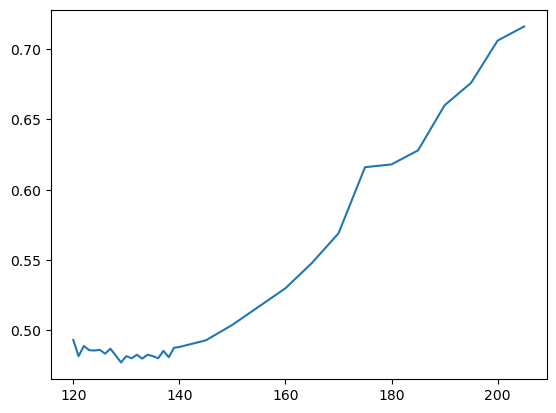

In [36]:
plt.plot(my_options['strike'],my_options['impliedVolatility2'])

<font size="3"> If this content is helpful and you want to make a donation please click on the button below. This helps us with the website maintenance. 

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)